<a href="https://colab.research.google.com/github/JoosepAlbre/IDS_Project/blob/main/Inital_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 18})
url = 'https://raw.githubusercontent.com/JoosepAlbre/IDS_Project/main/drug_deaths.csv'
data = pd.read_csv(url)
data


In [ ]:
#Display column headers
print(data.columns)
#List of irrelevant columns by index
columnsToRemove = [0, 1, 3, 8, 9, 11, 13, 15, 16, 17, 18, 20, -1, -2, -3]
#Remove columns with unnecessary information
data = data.drop(data.columns[columnsToRemove], axis=1)
data

In [ ]:
#Count all drugs ex. Other
print(data.columns)
columns = data.columns
drugs = {}

index = 0
#Fentanyl
index = 0
for i in data['Fentanyl']:
  if i[0] == "1":
    data.at[index, 'Fentanyl'] = 1
  index += 1
data['Fentanyl'] = data['Fentanyl'].astype('int64')

#Fentanyl_Analogue to Integer
data['Fentanyl_Analogue'] = data['Fentanyl_Analogue'].astype('int64')

#Morphine_NotHeroin
index = 0
for i in data['Morphine_NotHeroin']:
  if i != "0" and i != "1":
    data.at[index, 'Morphine_NotHeroin'] = 1
  index += 1
data['Morphine_NotHeroin'] = data['Morphine_NotHeroin'].astype('int64')

#AnyOpioid
index = 0
for i in data['AnyOpioid']:
  if i != "0" and i != "1":
    data.at[index, 'AnyOpioid'] = 1
  index += 1
data['AnyOpioid'] = data['AnyOpioid'].astype('int64')

#Display counted drugs
for i in range(9, 23, 1):
  drugCount = data[columns[i]].sum()
  drugs[columns[i]] = drugCount

for i in range(24, 26, 1):
  drugCount = data[columns[i]].sum()
  drugs[columns[i]] = drugCount

print(drugs)

Index(['Date', 'Age', 'Sex', 'Race', 'ResidenceCity', 'DeathCity', 'Location',
       'DescriptionofInjury', 'COD', 'Heroin', 'Cocaine', 'Fentanyl',
       'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
       'Morphine_NotHeroin', 'Hydromorphone', 'Other', 'OpiateNOS',
       'AnyOpioid', 'MannerofDeath'],
      dtype='object')
{'Heroin': 2529, 'Cocaine': 1521, 'Fentanyl': 2232, 'Fentanyl_Analogue': 389, 'Oxycodone': 607, 'Oxymorphone': 108, 'Ethanol': 1247, 'Hydrocodone': 118, 'Benzodiazepine': 1343, 'Methadone': 474, 'Amphet': 159, 'Tramad': 130, 'Morphine_NotHeroin': 42, 'Hydromorphone': 25, 'OpiateNOS': 88, 'AnyOpioid': 2466}


In [ ]:
#Count all drugs in Other
pd.set_option('max_rows', None)
data['Other']=data['Other'].str.lower()
data['Other']=data['Other'].str.strip()
data['Other'] = data['Other'].replace(to_replace=["buprenor", "bupren", "bupreno", "bupre", "buprenophine", "buprenor, carfentanil", "bupren, difluoro", "buprenorph", "buprenorphone", "buprnor", "buprenorphine", "buprno", "pcp. bupren", "bupren, hexadrone", "buprenorp", "buprop"],
                                      value= ["buprenorphine", "buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine","buprenorphine"])
data['Other'] = data['Other'].replace(to_replace=["pcp", "pcp, hydromorph", "pcp, morphine nos", "pcp, buprenor", "pcp, n-ethyl-pentylone"],
                                      value=["phencyclidine","phencyclidine","phencyclidine","phencyclidine","phencyclidine"])
data['Other'] = data['Other'].replace(to_replace=["morph", "morphine rx", "morphine no 6mam", "morphine, hydromorph", "morph nos", "rx morphine", "morph/cod", "morphine/hydromorph", "morphiine", "morphine/cod", "morphine, no rx in pmp", "morphin", "morph pcp"],
                                      value=["morphine", "morphine","morphine","morphine","morphine","morphine","morphine","morphine","morphine","morphine","morphine","morphine","morphine"])
data['Other'] = data['Other'].replace(to_replace=["hydromorph", ])
data['Other'].value_counts()








buprenorphine                90
morphine                     84
phencyclidine                68
u-47700                      15
opiate                       15
opiates                       8
mdma                          7
ketamine                      6
duster                        6
difluro                       5
codeine                       5
others                        5
opiate screen                 5
hydr-mor                      4
4-anpp                        4
cod                           4
tapentadol                    4
carfentanil                   4
hydromorp                     3
loperamide                    3
diphenhydramine               2
u-47700, carfentanil          2
ghb                           2
h-morph                       2
uk                            2
meperidine                    2
u47700                        2
diphenhy                      1
u-47700 synthetic opioid      1
hyd-morph                     1
butalbital                    1
diphenhy

In [ ]:
#Merge drugs 

In [ ]:
#Visualize drugs

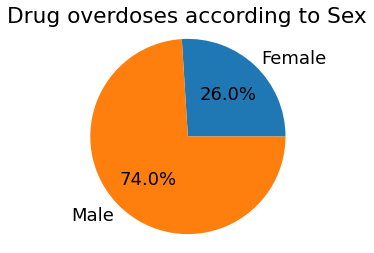

In [ ]:
#Visualize sex
data.Sex.replace(['Male', 'Female'], [0, 1], inplace = True)
male = (data['Sex'] == 0).sum()
female = (data['Sex'] == 1).sum()
myLabels = 'Female', 'Male'
plt.pie((female, male),labels=myLabels,autopct='%1.1f%%')
plt.title('Drug overdoses according to Sex')
plt.axis('equal')
plt.show()


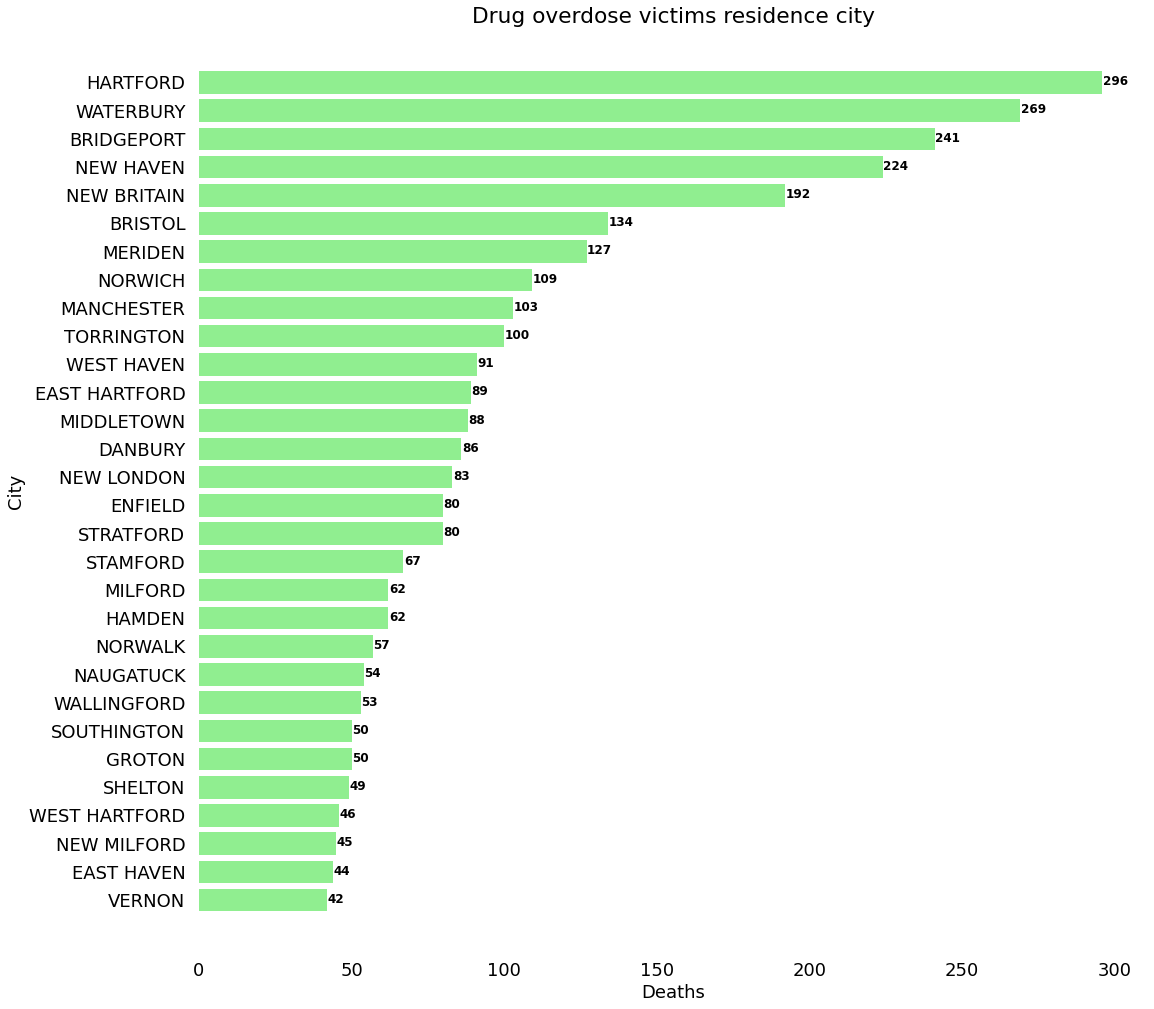

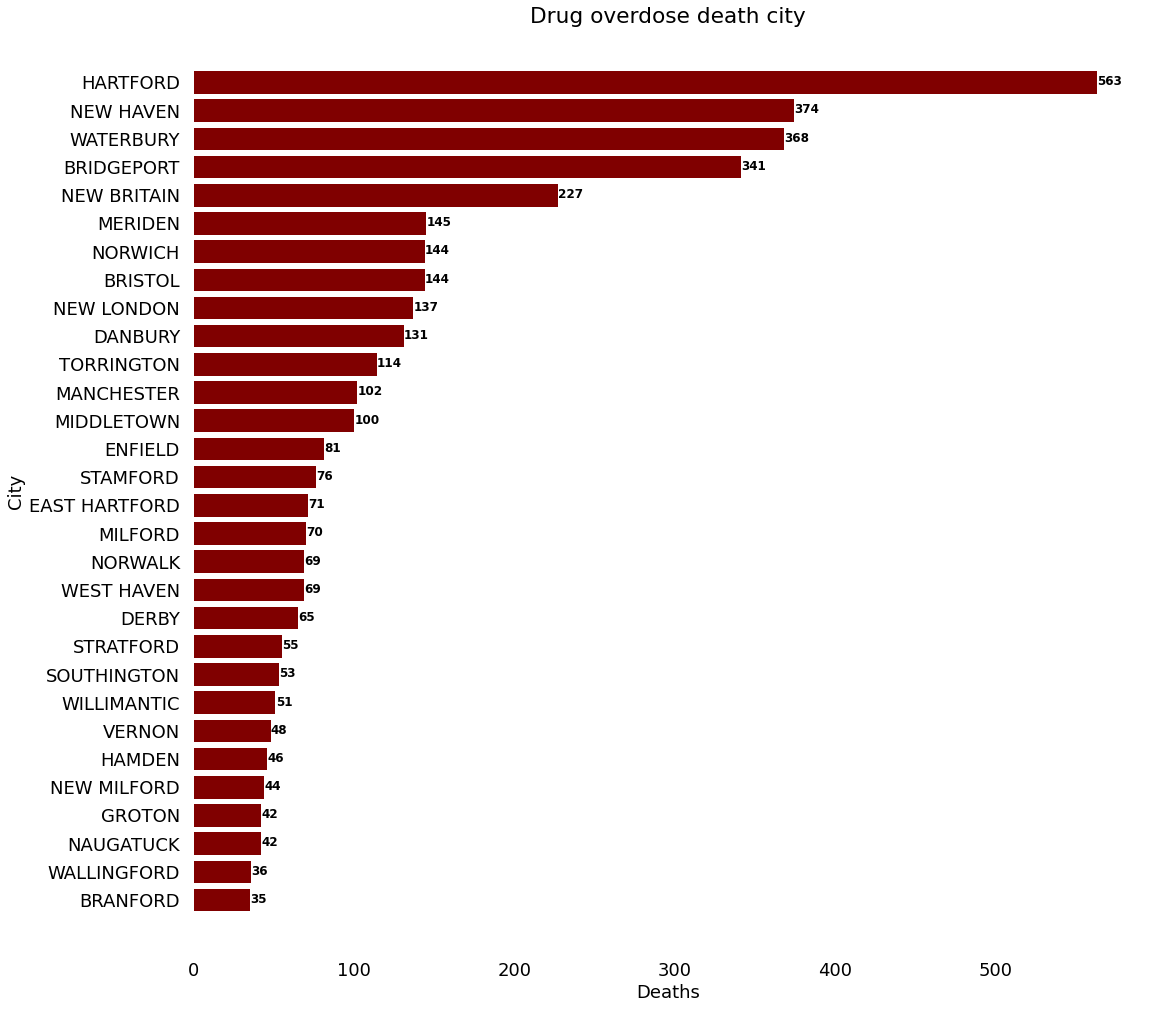

In [ ]:
#Visualize resident location
residentCount = pd.DataFrame(data['ResidenceCity'].value_counts())

fig, ax = plt.subplots(figsize =(17, 17))
ax.barh(residentCount.index[:30], residentCount['ResidenceCity'][:30], color='lightgreen') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

#Remove ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
#Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

#Show top as first
ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='Black') 
  
# Add Plot Title 
ax.set_title('Drug overdose victims residence city', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('City')
  
# Show Plot 
plt.show() 


#Visualize death location
deathCount = pd.DataFrame(data['DeathCity'].value_counts())

fig, ax = plt.subplots(figsize =(17, 17))
ax.barh(deathCount.index[:30], deathCount['DeathCity'][:30], color = 'maroon') 

for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 

#Remove ticks
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
#Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 

#Show top as first
ax.invert_yaxis() 

for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 12, fontweight ='bold', 
             color ='Black') 
  
# Add Plot Title 
ax.set_title('Drug overdose death city', 
             loc ='center', ) 
ax.set_xlabel('Deaths')
ax.set_ylabel('City')
  
# Show Plot 
plt.show() 

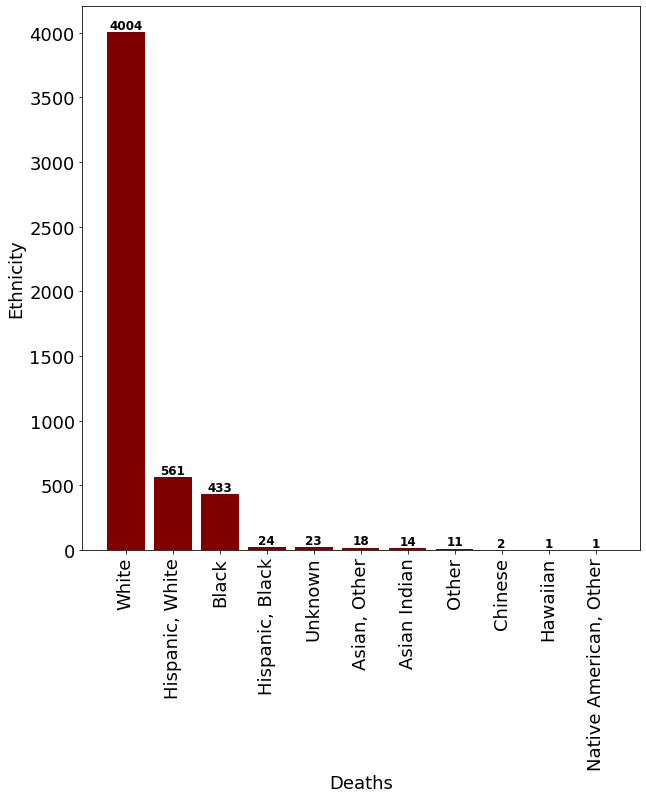

In [293]:
#Visualize race
race = pd.DataFrame(data['Race'].dropna().value_counts())
fig, ax =  plt.subplots(figsize =(10,10))
ax.bar(race.index, race['Race'], color = 'maroon')

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize = 12, fontweight ='bold', 
             color ='Black')
    
ax.set_xlabel('Deaths')
ax.set_ylabel('Ethnicity')
plt.xticks(rotation=90)
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


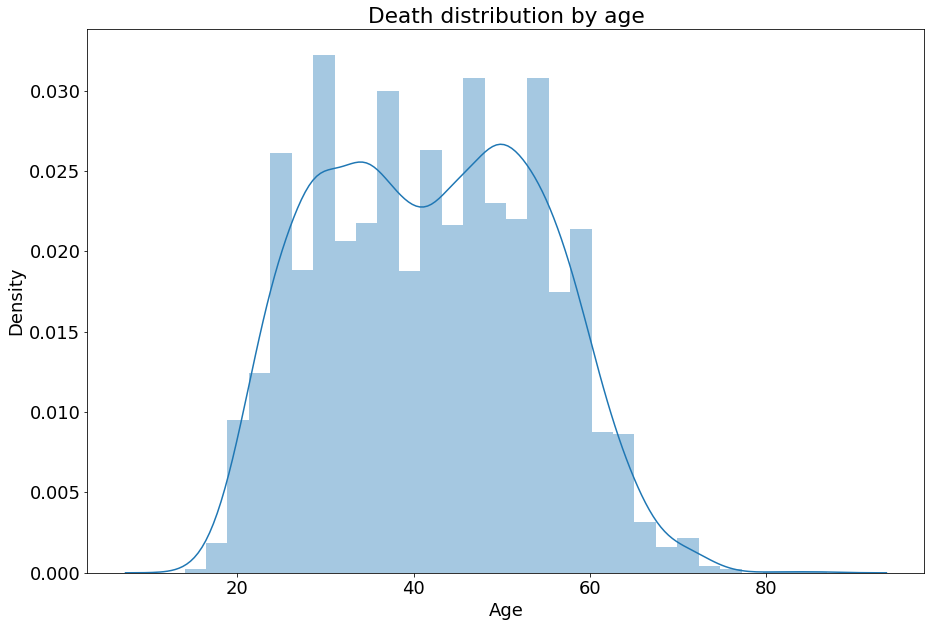

In [ ]:
#Visualize age
plt.figure(figsize=(15,10))
ax = sns.distplot(data['Age'].dropna(),bins = 30)
plt.xlabel('Age')
plt.title('Death distribution by age')
plt.show()

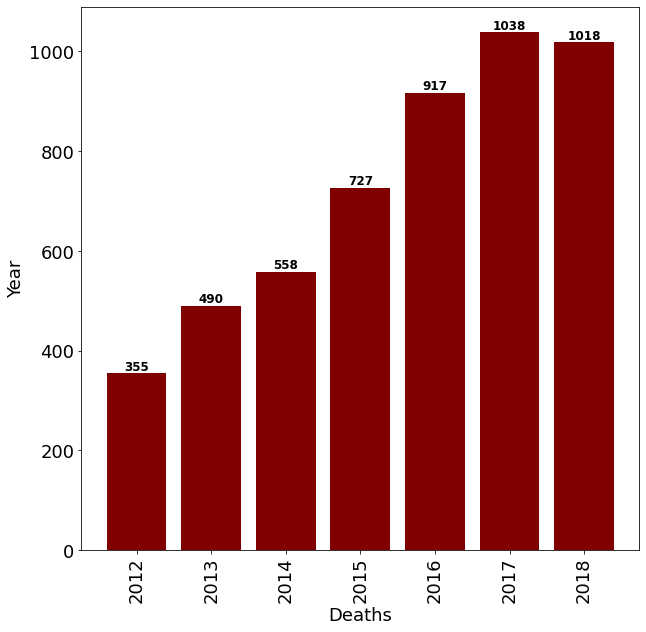

In [294]:
#Visualize death per year
year = pd.DataFrame(pd.to_datetime(data['Date']).dt.year.value_counts())
year.index = year.index.astype('int64')

fig, ax =  plt.subplots(figsize =(10,10))
ax.bar(year.index, year['Date'], color = 'maroon')

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize = 12, fontweight ='bold', 
             color ='Black')

ax.set_xlabel('Deaths')
ax.set_ylabel('Year')
plt.xticks(rotation=90)
plt.show()
#TODO
#Percentage of overall

In [ ]:
#Models

In [ ]:
#Testing